__Tulis Nama dan Nim__

Nama : Ananabilla Rizky Muhardanie

NIM : A11.2023.15502

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


Step 1: Pengumpulan Data

In [2]:
file_path = 'water_potability.csv'
water_data = pd.read_csv(file_path)
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Step 2: Menelaah Data

In [3]:
print(f"Jumlah baris dan kolom: {water_data.shape[0]} baris, {water_data.shape[1]} kolom\n")

Jumlah baris dan kolom: 3276 baris, 10 kolom



In [4]:
print("Informasi data per kolom::")
water_data.info()

Informasi data per kolom::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
print("Statistik Deskriptif:")
for col, describe in water_data.describe().items():
    print(f"- {col}: {describe} ")

Statistik Deskriptif:
- ph: count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64 
- Hardness: count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64 
- Solids: count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64 
- Chloramines: count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64 
- Sulfate: count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.07

In [6]:
print("Jumlah nilai unik per kolom:")
for col, unique in water_data.nunique().items():
    print(f"- {col}: {unique} ")

Jumlah nilai unik per kolom:
- ph: 2785 
- Hardness: 3276 
- Solids: 3276 
- Chloramines: 3276 
- Sulfate: 2495 
- Conductivity: 3276 
- Organic_carbon: 3276 
- Trihalomethanes: 3114 
- Turbidity: 3276 
- Potability: 2 


In [7]:
print("Jumlah nilai yang hilang per kolom:")
for col, missing in water_data.isnull().sum().items():
    print(f"- {col}: {missing} nilai hilang")

Jumlah nilai yang hilang per kolom:
- ph: 491 nilai hilang
- Hardness: 0 nilai hilang
- Solids: 0 nilai hilang
- Chloramines: 0 nilai hilang
- Sulfate: 781 nilai hilang
- Conductivity: 0 nilai hilang
- Organic_carbon: 0 nilai hilang
- Trihalomethanes: 162 nilai hilang
- Turbidity: 0 nilai hilang
- Potability: 0 nilai hilang


Step 3: Validasi dan Visualisasi Data

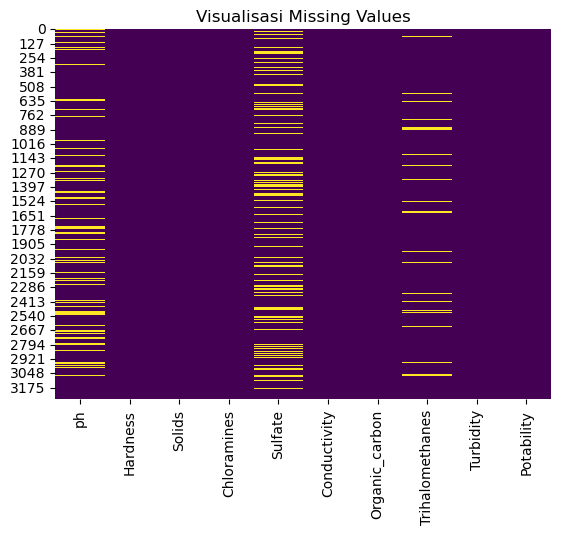

In [8]:
# Visualisasi Missing Values
sns.heatmap(water_data.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Missing Values")
plt.show()

In [9]:
# Handle Missing Values dengan Mean
water_data_filled = water_data.fillna(water_data.mean())

# Cek Outlier menggunakan IQR
print("Outlier Detection:")
for column in water_data_filled.columns[:-1]:  # Exclude 'Potability'
    Q1 = water_data_filled[column].quantile(0.25)
    Q3 = water_data_filled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = water_data_filled[(water_data_filled[column] < lower_bound) | (water_data_filled[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")

Outlier Detection:
ph: 142 outliers
Hardness: 83 outliers
Solids: 47 outliers
Chloramines: 61 outliers
Sulfate: 264 outliers
Conductivity: 11 outliers
Organic_carbon: 25 outliers
Trihalomethanes: 54 outliers
Turbidity: 19 outliers


In [10]:
imputer = SimpleImputer(strategy='mean')
water_data_imputed = pd.DataFrame(imputer.fit_transform(water_data), columns=water_data.columns)

In [11]:
print("Jumlah sampel sebelum resampling:")
print(water_data["Potability"].value_counts())
print()

Jumlah sampel sebelum resampling:
Potability
0    1998
1    1278
Name: count, dtype: int64



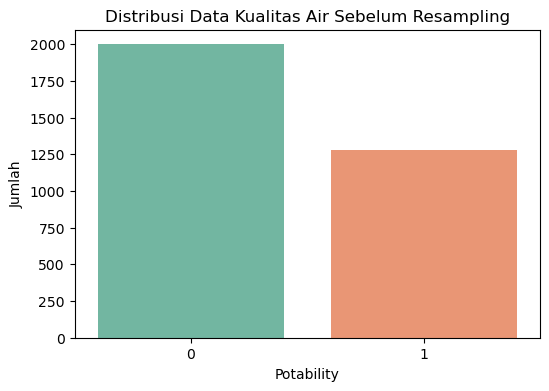

In [12]:
# Visualisasi distribusi sebelum resampling
plt.figure(figsize=(6, 4))
sns.countplot(x="Potability", data=water_data , palette="Set2")
plt.title("Distribusi Data Kualitas Air Sebelum Resampling")
plt.xlabel("Potability")
plt.ylabel("Jumlah")
plt.xticks([0, 1])
plt.show()

In [13]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'
X = water_data[features]
y = water_data[target]

# Resampling untuk mengatasi ketidakseimbangan kelas
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [14]:
# Jumlah sampel setelah resampling
print("Jumlah sampel setelah resampling:")
print(y_resampled.value_counts())

Jumlah sampel setelah resampling:
Potability
0    1998
1    1998
Name: count, dtype: int64


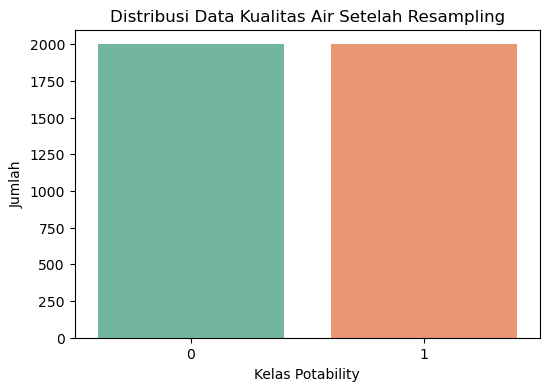

In [15]:
# Visualisasi distribusi setelah resampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette="Set2")
plt.title("Distribusi Data Kualitas Air Setelah Resampling")
plt.xlabel("Kelas Potability")
plt.ylabel("Jumlah")
plt.xticks([0, 1])
plt.show()

Step 4: Menentukan Object Data

In [16]:
X = X_resampled
y = y_resampled

Step 5: Membersihkan Data

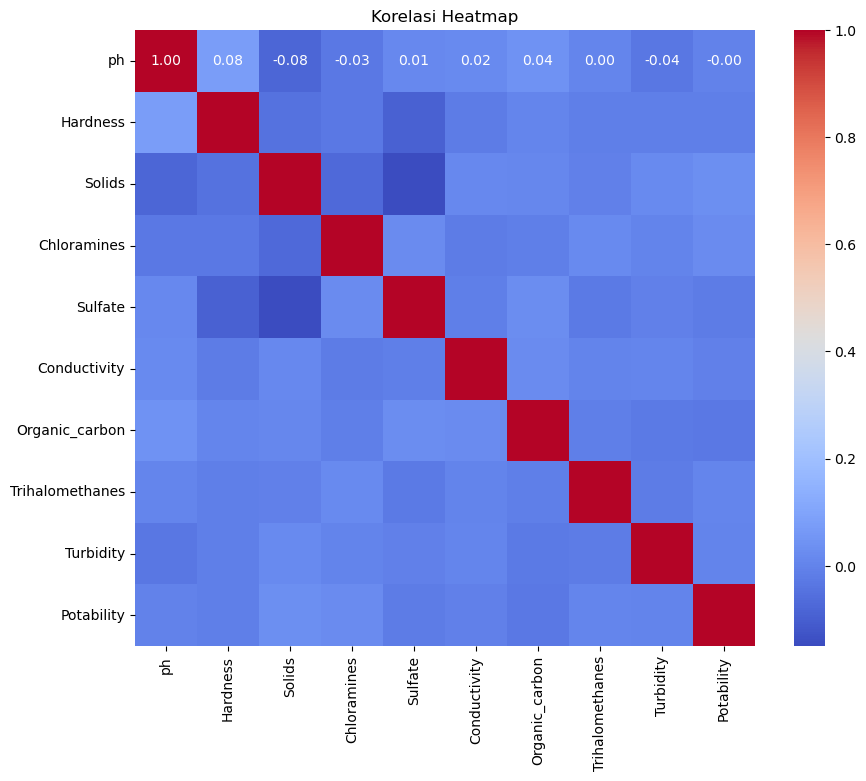

In [17]:
# Visualisasi korelasi antar atribut menggunakan heatmap
plt.figure(figsize=(10, 8))
corr_matrix = water_data_imputed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap')
plt.show()

c:\Users\Ananabilla Rizky M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ananabilla Rizky M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ananabilla Rizky M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ananabilla Rizky M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

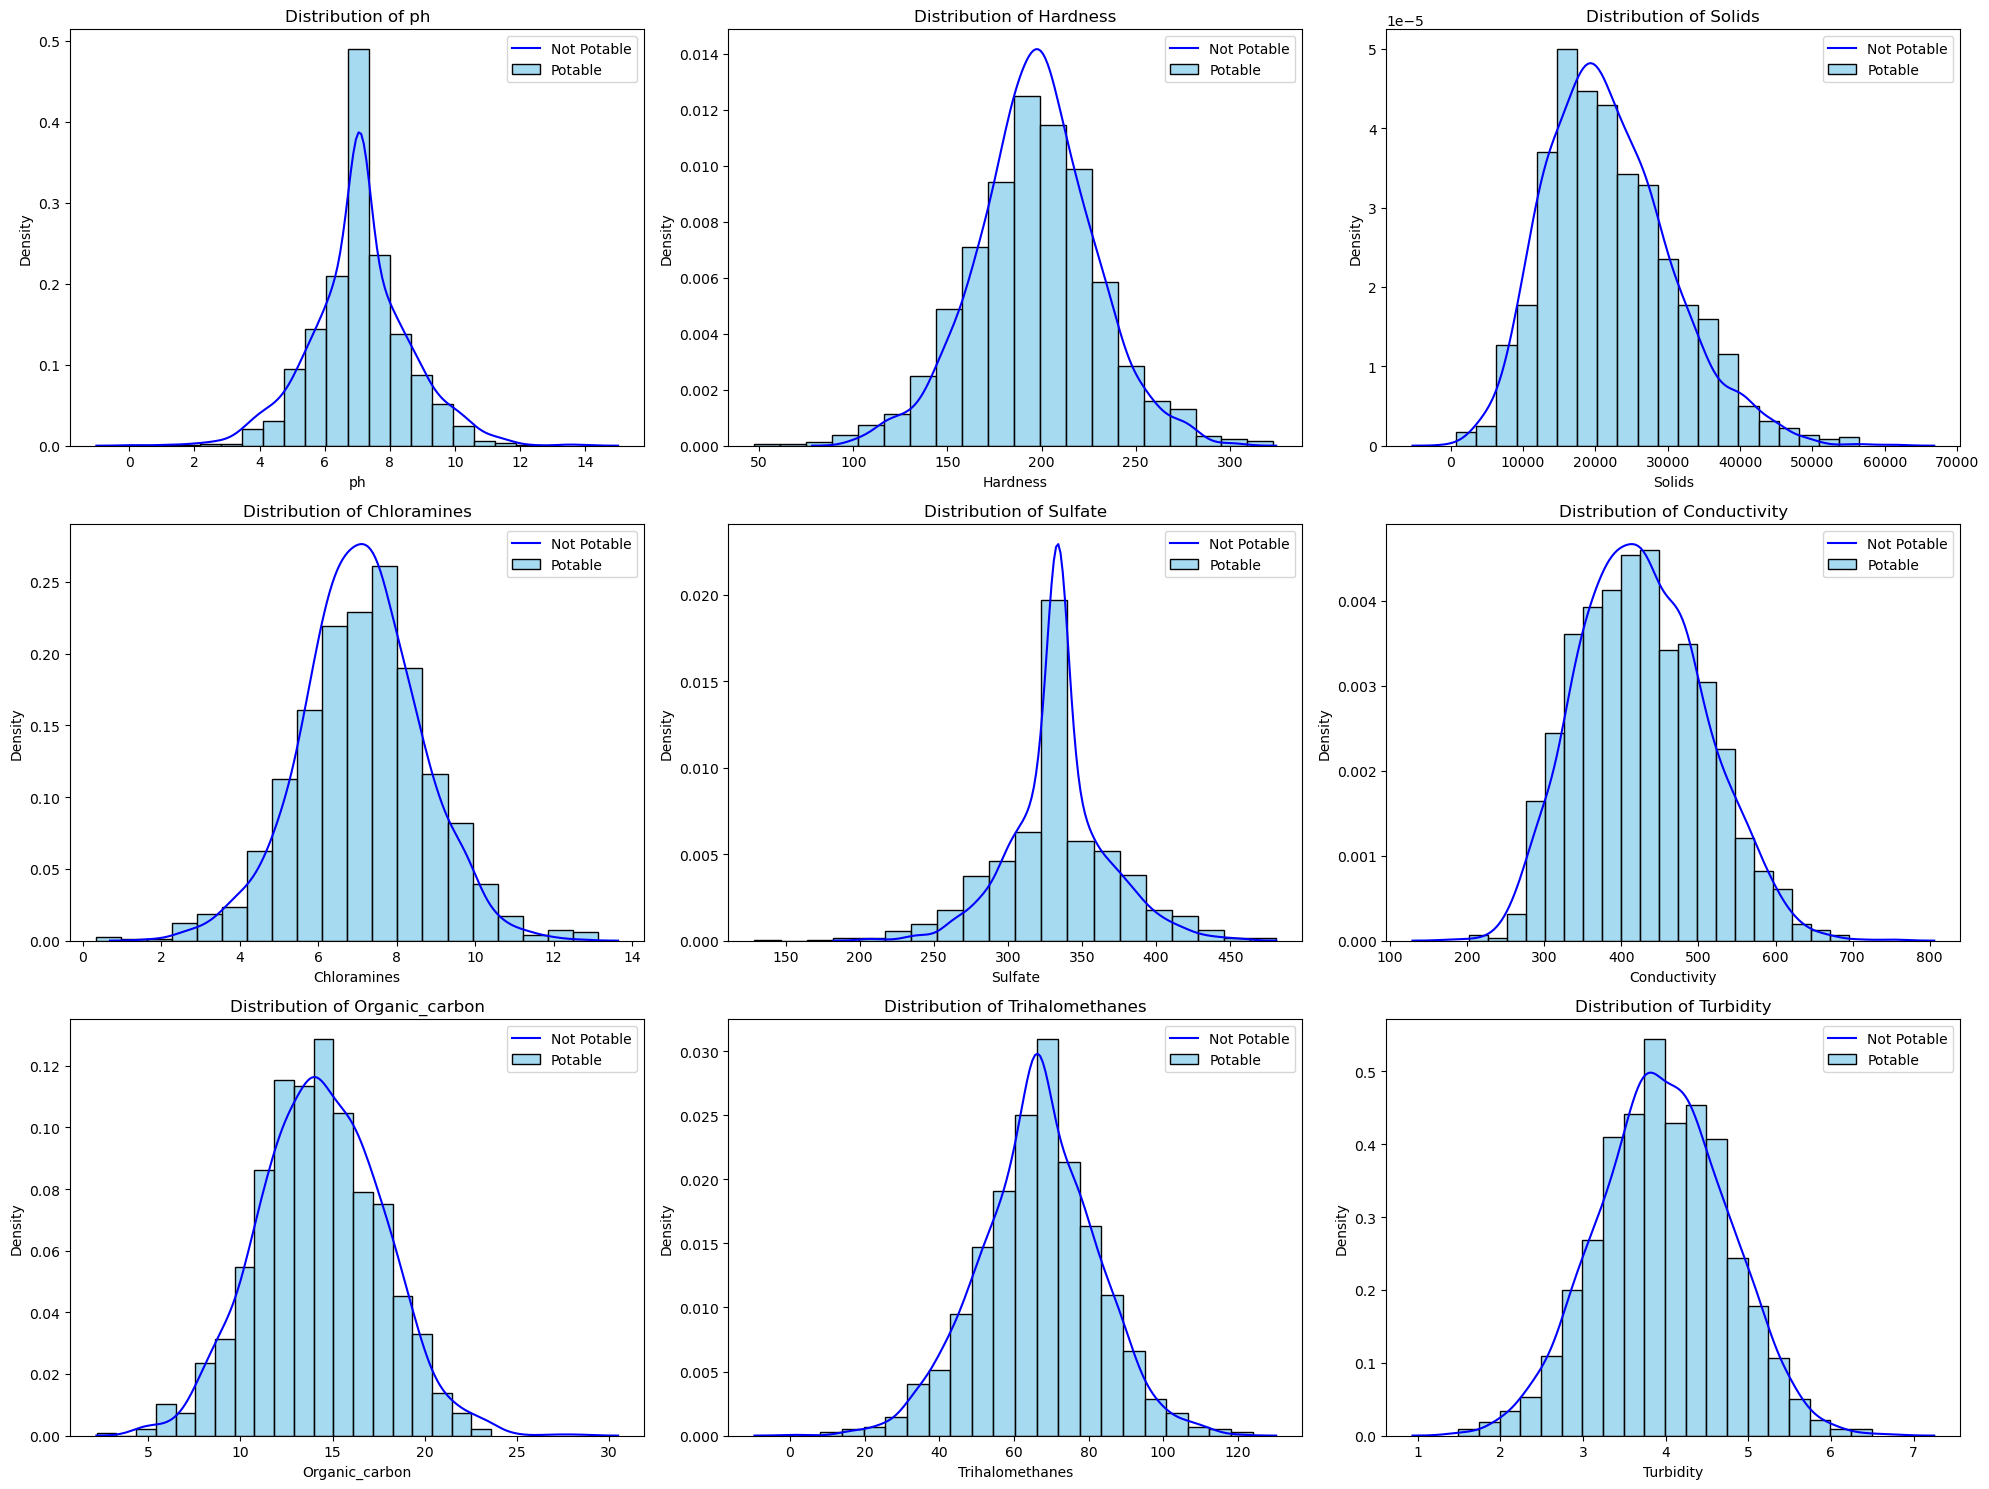

In [18]:
# Assuming 'water_data' is your DataFrame
potable_data = water_data_imputed[water_data_imputed['Potability'] == 1]
non_potable_data = water_data_imputed[water_data_imputed['Potability'] == 0]

# Get the list of numerical features (attributes) for plotting
numerical_features = water_data_imputed.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('Potability')  # Remove 'Potability' as it's the target variable

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    ax = axes[i]

    sns.kdeplot(non_potable_data[feature], ax=ax, label='Not Potable', color='blue', fill=False)


    sns.histplot(potable_data[feature], ax=ax, label='Potable', color='skyblue', stat="density", bins=20)

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

# Hide any unused subplots (if there are fewer than 9 numerical features)
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Step 6: Konstruksi Data (Penskalaan Data)

In [19]:
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

Step 7: Pemodelan

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Model definisi
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# Train dan evaluasi model
results_normalized = {}
conf_matrices = {}

for name, model in models.items():
    # Fit dan prediksi
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Simpan akurasi dan confusion matrix
    results_normalized[name] = accuracy_score(y_test, y_pred)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Tampilkan gambar confusion matrix
num_models = len(conf_matrices)

for i, (model, matrix) in enumerate(conf_matrices.items()):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.title(f'Confusion Matrix for {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()  # Menampilkan plot menggunakan matplotlib

NameError: name 'X_rssampled_scaled' is not defined

Step 8: Evaluasi

In [1210]:
# Sebelum Normalisasi
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

results_raw = {}
for name, model in models.items():
    model.fit(X_train_raw, y_train_raw)
    y_pred_raw = model.predict(X_test_raw)
    results_raw[name] = accuracy_score(y_test_raw, y_pred_raw)

# Tampilkan hasil
print("\nAkurasi Sebelum Normalisasi:")
for model, acc in results_raw.items():
    print(f"{model}: {acc*100:.1f}%")

print("\nAkurasi Setelah Normalisasi:")
for model, acc in results_normalized.items():
    print(f"{model}: {acc*100:.0f}%")


Akurasi Sebelum Normalisasi:
Random Forest: 77.9%
Decision Tree: 72.4%
XGBoost: 74.4%
CatBoost: 73.4%

Akurasi Setelah Normalisasi:
Random Forest: 78%
Decision Tree: 72%
XGBoost: 74%
CatBoost: 73%


### **Kesimpulan**
1. **Perbandingan Akurasi**:
   - Random Forest: Akurasi tertinggi (78%).
   - XGBoost: Cukup baik (74%).
   - CatBoost: Mendekati XGBoost (73%).
   - Decision Tree: Akurasi terendah (72%)

2. **Kelebihan dan Kekurangan Algoritma**
   - **Random Forest**: Stabil dan akurat, namun memerlukan sumber daya komputasi lebih besar.
   - **XGBoost**: Cepat dan efisien, tetapi sensitif terhadap parameter.
   - **CatBoost**: Unggul pada data kategoris, namun lebih lambat dibanding XGBoost.
   - **Decision Tree**: Mudah dipahami, namun rentan overfitting.

3. **Rekomendasi**:
   - Gunakan Random Forest untuk akurasi tertinggi jika performa komputasi tidak menjadi kendala.
   - Pilih XGBoost atau CatBoost untuk efisiensi dan jika terdapat banyak fitur kategoris.
   - Decision Tree cocok untuk analisis awal atau model yang mudah dijelaskan.